In [2]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Experimenting with the tutorial
The following tasks are related to the week 4 tutorial.
 
The individual tasks will ask you to either reflect on parts of the tutorial or modify specific code cells from the tutorial. Specifically, [Task 2](#project) and [Task 3](#ls) require modifications to the code of your copy of the tutorial notebook.
 

<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#copy">Task 1: Copy notebook</a>
            </li>
            <li>
            <a href="#project">Task 2: Projection experiments</a>
            </li>
            <li>
            <a href="#ls">Task 3: Linear Least Squares Experiments</a>
            </li>
            <li>
            <a href="#poly">Task 4: Second-order polynomial</a>
            </li>
            <li>
            <a href="#pmatrix">Task 5: Projection matrix</a>
            </li>
        </ul>
    </div>
</article>

## Experiments for the tutorial notebook

---
**Task 1 (easy): Copy notebook**
Copy the tutorial notebook
 in the repository. 
This makes it easy to go back to the original in case something goes wrong.

---
---
**Task 2 (easy): Projection experiments👩‍💻**
This task builds on the $\textbf{Projections}$ section in the tutorial.
1. Search and identify comment `##1`
. 
2. Change the values of the matrix $A$ (below comment `##1`
) to modify the line. Experiment with different values and observe how the projection changes in the plot.
3. Change the matrix $A$, such that $PX$ ≈ $X$ (that is the projection leaves $X$ almost unchanged). 
4. Search and identify comment `##2`
.
5. Set the matrix $A$  = $\begin{bmatrix} 1 \\ 0.5 \end{bmatrix}$, then apply the projection matrix $P$ twice, i.e. calculate $PPX$ (just below the comment). How does this affect the projected points?


---

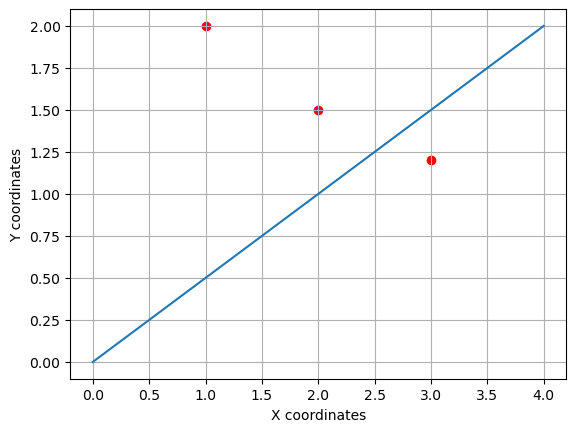

In [3]:
# Write your solution here
# importing libraries
import numpy as np
import matplotlib.pyplot as plt


# Three points
X = np.array([
    [1, 2],
    [2, 1.5],
    [3, 1.2]
]).T

# Show plot
plt.scatter(X[0, :], X[1, :], c="r")

# Make line points (remember Numpy broadcasting)
x = np.linspace(0, 4)
f_x = x * 0.5

# Plot line
# Add grid lines
plt.grid(True)
plt.plot(x, f_x)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.show()

##1
#The line l written as the design matrix
A = np.array([[1, 0.5]]).T  #  has to be a column vector    




P:
 [[0.8 0.4]
 [0.4 0.2]]
projected points:
 [[1.6  2.2  2.88]
 [0.8  1.1  1.44]]


Text(0, 0.5, 'Y coordinates')

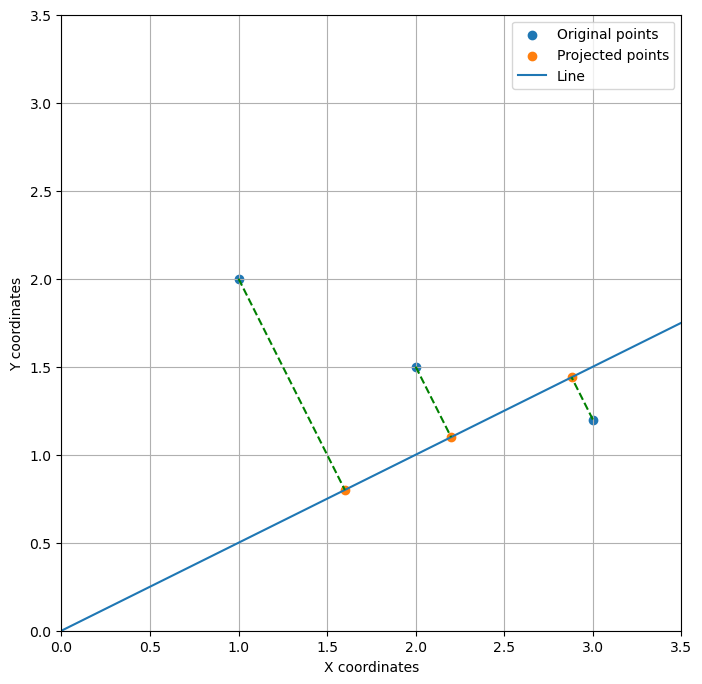

In [4]:

##2
## construct projection matrix
P = (A @ np.linalg.inv(A.T @ A)) @ A.T
print("P:\n", P)

#projection the points with matrix multiplication
x_prime =  P @ (P @ X)
print("projected points:\n", x_prime)

# Creating a square figure (makes it easier to visually confirm projection)
plt.figure(figsize=(8, 8))

plt.scatter(X[0, :], X[1, :], label="Original points")  # Old points
plt.scatter(x_prime[0, :], x_prime[1, :], label="Projected points")  # Projected points
plt.plot(x, f_x, label="Line")  # Line
plt.legend()

# Gather old and projected points in a single array
P1 = np.concatenate([X.T[:, :].reshape(1, 3, 2), x_prime.T[:, :].reshape(1, 3, 2)], axis=0)
# Plot projection/error lines
plt.plot(P1[:, 0, 0], P1[:, 0, 1], 'g--')
plt.plot(P1[:, 1, 0], P1[:, 1, 1], 'g--')
plt.plot(P1[:, 2, 0], P1[:, 2, 1], 'g--')
# Add grid lines
plt.grid(True)
# Set axes limits to be the same for equal aspect ratio
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")


---
**Task 3 (easy): Linear Least Squares Experiments👩‍💻**
This task builds on the $\textbf{Linear Least Squares}$ section in the tutorial.
1. Search and identify comment `##3`
.
2. Change the values of the first point in the matrix `X`
 such that it gradually moves further and further away from the line. Observe how it affects the error $RMS$.
start 0.4
2.2 = 1.77
3.3 = 0.7
4.4 = 0.8
10.0 = 0.18

3. Add two points to `X`
 and observe how they affect the fitted line and the error.    - How can you change the two additional points so the fitted line does not move?
depends.. if we fit them right rms goes down, otherwise up..depends how wacky the graph is

if we make sure they are are are scalers of previous vectors 

4. What happens to the error when removing all but two points from `X`
bascially zero... very easy to make a line through two points
5. What happens when you remove all but one point from `X`
well then we crash.. obviously
6. Reflect on how the quality of the data affects the projection and thus the solution. 
more data points gives a better model. but it all depends on overfitting


---

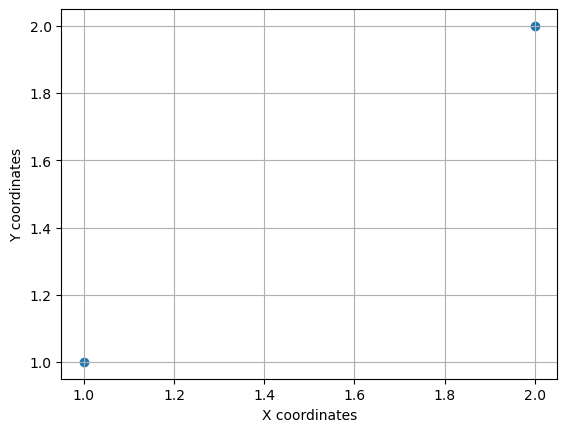

A
 [[1. 1.]
 [2. 1.]]
w: [ 1.00000000e+00 -3.10862447e-15]


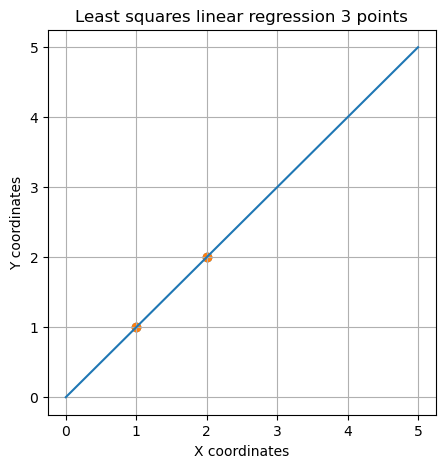

e 1.6011864169946884e-15
root mean squared error 1.6011864169946884e-15


In [5]:
## 3
# Define the example points
X = np.array([
    [1, 1],
    [2,2]
]).T

plt.grid(True)
plt.scatter(X[0, :], X[1, :])
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
# Display the plot
plt.show()
x_vals = X[0, :]
y_vals = X[1, :]

A = np.vstack((x_vals, np.ones(x_vals.shape))).T
print("A\n", A)

P = np.linalg.inv(A.T @ A) @ A.T
# Applying the transformation
w = P @ y_vals
print("w:", w)


y_hat = A @ w

x = np.linspace(0, 5)  # Create range of values
y = x * w[0] + w[1]  # Calculate f(x)

plt.figure(figsize=(5, 5))

plt.plot(x, y)  # Plot line
plt.scatter(X[0, :], X[1, :])  # Plot original points

plt.scatter(X[0, :], y_hat)  # Plot the points
plt.title('Least squares linear regression 3 points')
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True)
plt.show()

diff = y_vals - y_hat
e = np.sqrt(diff @ diff.T)
print("e", e)


diff = y_vals - y_hat
rms = np.sqrt((diff @ diff.T).mean())
print("root mean squared error", rms)


## Pen and paper exercises
A 2. order polynomial is given by 

$$f(x) = w_0 + w_1x + w_2x^2 = \sum^2_{i=0} w_ix^i.$$

Generally, an $N$'th order  polynomial is given by

$$f(x) = \sum^N_{i=0} w_ix^i,$$
where $\mathbb{w}$ is a vector of coefficients.

---
**Task 4 (medium): Second-order polynomial♾️**
1. Identify the knowns and unknowns in the polynomial above.
2. Is the function linear or non-linear in $\mathbb{w}$?
3. Is the function linear or non-linear in $\mathbb{x}$?
4. Provide the outline of an algorithm for fitting a second-order polynomial using linear least squares.
5. Generalize this algorithm to n-th order polynomials.


---

In [6]:
# Write your solution here


---
**Task 5 (medium): Projection matrix♾️**
The projection matrix $P = A(A^\top A )^{-1}A^\top$ is, under certain conditions, equal to the identity matrix.
1. Give an example of a design matrix $A$ for which $P=I$.
2. Explain why projection matrices are usually not identity matrices.
3. (optional) Prove a condition for which $P=I$. Hint: when is $A^\top A=I$?.


---

In [11]:
# Write your solution here
a = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]])

temp = a.T @ a

more = a @ np.linalg.inv(temp) @ a.T

print(a)
print(temp)
print(more)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
